GWP 3 
- Magnifying Risk Factors: Leverage & Non-linearity
- Statistical Related Risk: Volatility & Statistical Related Risk: Correlation

1) concepts explained in words

2) concepts explained using at least two asset classes with real-world data

3) concepts explained using real-world applications.


## Section 1

**Magnifying Risk Factors: Leverage & Non-linearity**

To use leverage in finance is to increase potential returns on an investment using borrowed funds or particular financial instruments. By using leverage, one can achieve larger returns or losses than be had with only one's own capital. Since leverage can magnify both gains and losses, it can be considered a double edged sword.

Non-linearity means that the performance of a financial instrument is not directly proportional to the size of the inputs. For example, in options investing the returns do not exhibit a linear relationship with price. Outsized gains can be made with a sufficient change in price, but otherwise the entire investment may be lost. Non-linearity can cause sudden large changes in the value of the investment, and can make financial instruments riskier.

An visual example of a non-linear return is shown below, for a long call option.

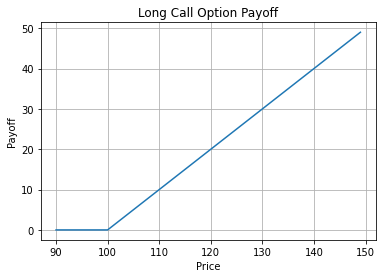

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

strike = 100
x = np.arange(90, 150)

# Calculate the payoff for a long call option
y = np.maximum(x - strike, 0)

# Plot the payoff chart
plt.plot(x, y)
plt.xlabel("Price")
plt.ylabel("Payoff")
plt.title("Long Call Option Payoff")
plt.grid()
plt.show()


**Statistical Related Risk: Volatility & Statistical Related Risk: Correlation**

Volatility measures the rate of price changes of financial instruments over some period of time. Usually it is measured daily, but can also be calculated for minutes or years. It is commonly represented by the standard deviation of return over a specified period. An asset with high volatility means that its price changes rapidly, as opposed to a low volatility asset with price changes of smaller magnitude.

The equation for asset volatility (standard deviation) is:

$$\sigma_X = \sqrt{\frac{\sum_{i=1}^{n} (R_i - \bar{R})^2}{n-1}}$$

where:
- $\sigma_X$ is the volatility of asset $X$
- $R_i$ is the return of asset $X$ at time $i$
- $\bar{R}$ is the mean return of asset $X$
- $n$ is the number of observations

Stocks tend to have higher expected return and correspondingly higher risk than high grade bonds. This positive correlation is generally true and the higher returns can be considered a premium for the added risk of owning the risky asset.

Assets have particular statistical characteristics on their own and in relation with other assets. When multiple assets are combined, the expected return and volatility of the portfolio can be derived. The overall portfolio statistical risk is determined by the size and composition of individual assets within, and how asset prices in the portfolio tend to move in relation to one another.

To measure the directional relationship between two asset prices  $X$ and $Y$, the covariance metric can be used:

$$\text{Cov}(X, Y) = \frac{\sum_{i=1}^{n} (R_{X,i} - \bar{R}_X)(R_{Y,i} - \bar{R}_Y)}{n-1}$$

where:
- $\text{Cov}(X, Y)$ is the covariance between assets $X$ and $Y$
- $R_{X,i}$ and $R_{Y,i}$ are the returns of assets $X$ and $Y$ at time $i$, respectively
- $\bar{R}_X$ and $\bar{R}_Y$ are the mean returns of assets $X$ and $Y$, respectively
- $n$ is the number of observations

A large positive covariance means that asset prices tend to move away from the mean in the same direction, a large negative means that they move in opposite directions. Using the covariance, correlation can be computed as follows:

$$\rho_{XY} = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y}$$

where:
- $\rho_{XY}$ is the correlation between assets $X$ and $Y$
- $\text{Cov}(X, Y)$ is the covariance between assets $X$ and $Y$
- $\sigma_X$ and $\sigma_Y$ are the standard deviations of returns for assets $X$ and $Y$, respectively

Within a portfolio, it is possible to lower the overall risk by obtaining individual components that are negatively correlated. For example, one can buy stocks across multiple industries instead of concentrating on a single industry. Stock prices in multiple industries are less likely to move in the same direction as stocks in a single industry.

**Demonstration with numbers**

Let's say we invest \\$1000 in the stock XYZ, just using cash. After a month, the stock has moved up 2%. Our return on investment is

$$\$1000 * 0.02 = \$ 20$$

Now let's consider the case where we instead use leverage: we borrow another \\$1000 and open a position of \\$2000 in the stock XYZ. After a month, the stock has moved up 2%. The return on the position is

$$\$2000 * 0.02 = \$ 40$$

And the return on investment is 

$$ 40/1000 = 0.04 $$

So using a 2x leverage we effectively doubled our return on investment.

Of course the same would happen if the stock moved down 2%, in that case our return would be -4%.

## Section 2

Now we will illustrate the effect of leverage on the daily returns of Bitcoin.

In [ ]:
!pip install ccxt

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import ccxt
import pandas as pd

In [ ]:
# Use the ccxt library to fetch historical prices of Bitcoin
exchange = ccxt.bybit()
start_ts = int(datetime(2021, 2, 5).timestamp() * 1000)
# Load daily candles
res = exchange.fetch_ohlcv('BTCUSDT', '1d', since=start_ts)
# Create pandas dataframe
df = pd.DataFrame(data=res, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
price0 = df["close"].iloc[0]
df['time'] = pd.to_datetime(df['timestamp'], unit='ms')
# Define returns without leverage and with leverage
df["roi"] = (df["close"] - df["close"].shift(1)) / df["close"] * 100
df["roi10x"] = 10 * (df["close"] - df["close"].shift(1)) / df["close"] * 100

df.describe()

,timestamp,open,high,low,close,volume,roi,roi10x
count,2.000000e+02,200.000000,200.000000,200.000000,200.000000,200.000000,199.000000,199.000000
mean,1.621080e+12,45831.570000,47328.205000,44129.517500,45894.605000,47199.809745,0.030775,0.307753
std,5.000762e+09,9536.200696,9664.894553,9412.400849,9519.020374,32639.060802,4.451485,44.514854
min,1.612483e+12,29765.000000,31032.000000,28774.000000,29765.000000,9245.302000,-16.817328,-168.173279
25%,1.616782e+12,36814.375000,38228.250000,34818.000000,36814.375000,20995.984250,-2.139832,-21.398322
50%,1.621080e+12,46407.000000,48214.750000,44808.000000,46431.000000,39260.193000,0.008943,0.089425
75%,1.625378e+12,55621.500000,57041.625000,53188.750000,55621.500000,63633.073000,2.610746,26.107462
max,1.629677e+12,63587.500000,64943.500000,62180.000000,63587.500000,194517.585000,16.324353,163.243534


From the description of the dataset we can already get some important information about the effect of leverage:
- The standard deviation of the returns with 10x leverage is 10 times higher than the standard deviation of the returns without leverage. This means that leverage directly affects the volatility of the position.
- While the lowest return without leverage is -16.8%, the lowest return with leverage is -168%. This is of course impossible, and the position would have been forced to close once the margin requirements were not met, unless further margin was deposited.
- At the same time, the maximum return is also amplified in the same way, confirming that leverage brings higher risk and higher reward.

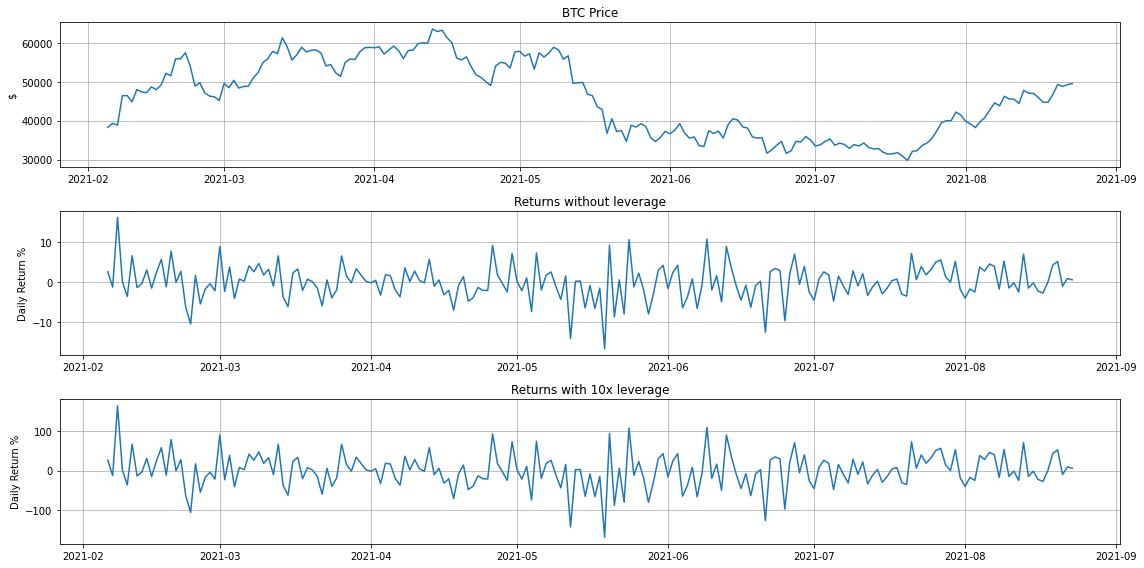

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 8))

ax1.set_title('BTC Price')
ax1.plot(df['time'], df['close'])
ax1.set_ylabel('$')
ax1.grid()

ax2.set_title('Returns without leverage')
ax2.plot(df['time'], df['roi'])
ax2.set_ylabel('Daily Return %')
ax2.grid()

ax3.set_title('Returns with 10x leverage')
ax3.plot(df['time'], df['roi10x'])
ax3.set_ylabel('Daily Return %')
ax3.grid()

fig.tight_layout()
plt.show()

## Section 3

Now, lets look at the real world application of the concepts discussed above

**FINANCIAL CRISIS DUE TO LEVERAGE:**

The financial crisis surely has the tendency to rattle the entire world upside down! There could be multiple reasons unknown yet arguable, more questions raised than answered. Yet, the world as we live today, has got stuck into the economic cycle which brings the expansion and ression pace, probably as a result of the leverage cycle which aids the economic activity.

The article referenced talks about the possible reasons for the Global Financial Crisis of 2007–2009 and the possible regulations that could mitigate its risks in the future.

During expansion phase, the interest rates would be less and thus, encouraging people to increase their spending which leads to a bustling business activities.

The banks would want to offer the loans to the people so that they could increase their treasury. Certain banks even offered loans without doing a risk analysis, thus pulling themselves into trouble. In order to attract people to this leverage cycle, banks and other financial institutions advertise, market, and force people to buy the schemes without trying to explain the risks involved.

Banks are often large institutions, and as a result, they spend a lot on innovative products to limit their risk and increase it. One such innovative product is securitization.

**SECURITIZATION**


Securitization are a type of financial product where certain loans are pooled and grouped into different tranches for different risk profiles. Thus, the banks have diverted their risks. The people on the lending side are not fully aware of the risks involved. The rating agencies and other financial firms were too keen to market this and increase their business.

These products were further used to pledge, which added more fuel to the fire, like the Domino's effect, extending its arms further and further. Though the product looks structured, the leverage was intense, and risk management came to a total collapse.

**Leverage as an indicator for financial crisis**

Almost all financial crises point to leverage as the root cause, followed by credit expansion, which makes it difficult to absorb the loss and causes unreasonably high asset prices due to leveraged spending.

As a result, studying the leverage in the economy is a very good indicator for predicting the financial crisis. The debt-to-GDP ratio on the macroeconomic scale and the debt-to-asset ratio on the microeconomic scale are two sub-good indicators.

An increased and higher trend in the debt-to-GDP ratio could be an onslaught for the crisis as it clearly points out the leverage and non-linearity in people's spending in the market, which could become a bubble if not addressed or investigated soon.


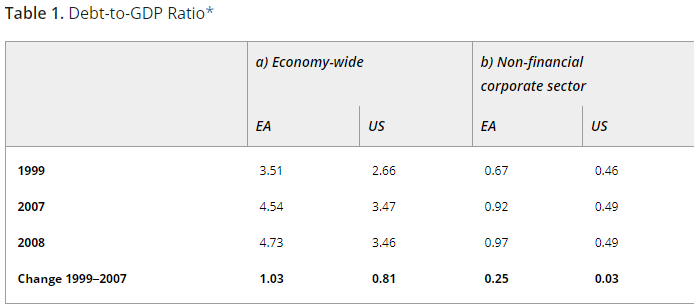

The figure above shows the trends observed in the Debt to GDP Ratio

The capital requirements were poorly assessed, and the borrowers got the liberty to even get loans without a basic assessment. They are called predatory lending practices. The collateralized debt obligations issued by the banks were made from riskier loans, and the investors were not fully aware because the rating agencies gave them AAA ratings to bag the commissions.

The housing prices kept increasing, and the people were not able to keep up the pace of rising interest rates due to their bad profiles, and as a result, people started to default, and this has become too aggressive because the financial leverage is very huge in this process. More people started to default, which led to more assets that can't be liquified very easily to return the money to the lenders.

The prices of the houses was falling not because of the default from few borrowers but the buyers has become too less because the amount of leverage was so huge that the leverage couldn't go any further higher and has peaked out

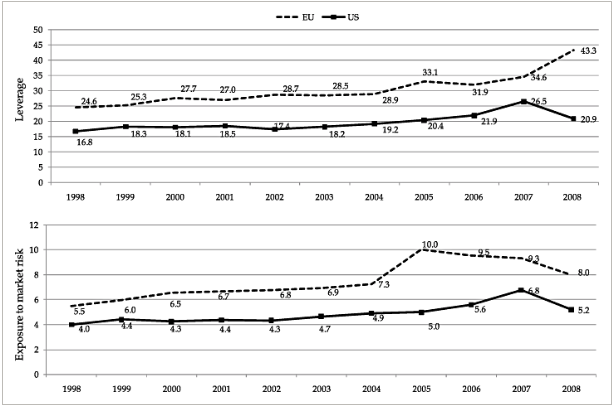


The graph shows the leverages offered by big banks and their exposure to their market risks

To keep financial institutions hopeful, the leveraged products, as well as the structure and procedure by which the leverage is offered, should change. Proper equity, income, and risk analysis must be improved before offering leverage to the public, and the ability to absorb the loss (credit absorption) must be analysed as mentioned before.

 **The leverage is a Double-edged sword**
 
Before taking a leveraged position, an educated individual or institution would first analyse the cons rather than the pros. The innovation did cause reckless betting and excessive use of leverage, but a proper monetary policy and regulation would definitely help reduce the instability in the near future.



REFERENCES:

https://onlinelibrary.wiley.com/doi/full/10.1111/j.1468-5965.2009.02031.x 

The Global Financial Crisis: Causes and Cures 
               -JACOPO CARMASSI, DANIEL GROS, STEFANO MICOSSI